In [120]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


print(tf.__version__)

1.11.0


In [121]:
import os
import pandas as pd
import numpy as np

class Attribute:
    def __init__(self, p='/vagrant/imgs/list_attr_celeba.csv'):
        self.df = pd.read_csv(p)

    def mod_image_path(self, image_path):
        if 'png' in image_path:
            return image_path.replace('png', 'jpg')
        return image_path

    def _get_row(self, image_path):
        image_path = self.mod_image_path(image_path)
        return self.df.loc[self.df['image_id'] == image_path]		

    def get_attributes_list(self, image_path):
        row = self._get_row(image_path)
        return row.values.tolist()[0][1:]


In [122]:
a = Attribute()

In [123]:
p = '/vagrant/imgs/training_data/training_data/aligned'
d = os.listdir(p)

In [124]:
images = []
for im_path in d[:4000]:
    image = cv2.imread(os.path.join(p, im_path))
    images.append(image)
images = np.array(images)

In [125]:
images = images / 255

In [126]:
train_X, test_X = images[:3000], images[3000:]
train_X, val_X = train_X[:2000], train_X[2000:]

In [127]:
labels = np.array([a.get_attributes_list(img_path) for img_path in d[:4000]])

In [128]:
labels[labels < 0] = 0

In [129]:
train_Y, test_Y = labels[:3000], labels[3000:]
train_Y, val_Y = train_Y[:2000], train_Y[2000:]

In [130]:
def create_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(95, 95, 3)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(40, activation=tf.nn.sigmoid)
    ])
    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [131]:
model = create_model()

In [132]:
history = model.fit(train_X,
                    train_Y,
                    epochs=40,
                    batch_size=256,
                    validation_data=(val_X, val_Y),
                    verbose=1)

Train on 2000 samples, validate on 1000 samples
Epoch 1/40
2000/2000 [==============================] - 5s 2ms/step - loss: 1.7535 - acc: 0.7279 - val_loss: 1.4190 - val_acc: 0.7919
Epoch 2/40
2000/2000 [==============================] - 3s 2ms/step - loss: 1.2818 - acc: 0.7697 - val_loss: 1.1659 - val_acc: 0.7581
Epoch 3/40
2000/2000 [==============================] - 3s 1ms/step - loss: 1.0307 - acc: 0.7776 - val_loss: 0.9136 - val_acc: 0.7644
Epoch 4/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.8375 - acc: 0.7897 - val_loss: 0.8134 - val_acc: 0.7933
Epoch 5/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.7759 - acc: 0.8038 - val_loss: 0.7609 - val_acc: 0.8155
Epoch 6/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.7185 - acc: 0.8107 - val_loss: 0.6912 - val_acc: 0.8115
Epoch 7/40
2000/2000 [==============================] - 2s 832us/step - loss: 0.6373 - acc: 0.8154 - val_loss: 0.5988 - val_acc: 0.8133
Epoch 8/40
2

In [133]:
results = model.evaluate(test_X, test_Y)

print(results)

1000/1000 [==============================] - 0s 387us/step
[0.3612042717933655, 0.8453749895095826]


In [134]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

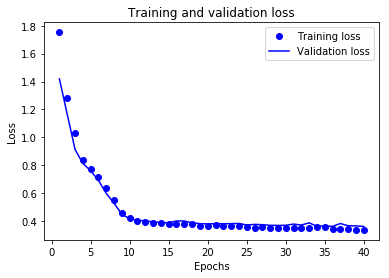

In [135]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

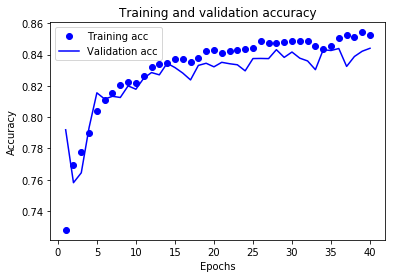

In [136]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 27075)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3465728   
_________________________________________________________________
dense_7 (Dense)              (None, 40)                5160      
Total params: 3,470,888
Trainable params: 3,470,888
Non-trainable params: 0
_________________________________________________________________


In [138]:
predictions = model.predict(test_X)
print(predictions[0])

[0.10852833 0.12919381 0.51755536 0.08838898 0.00707914 0.07303531
 0.27763084 0.15056613 0.44636238 0.02346    0.03914503 0.22989658
 0.18699455 0.03112389 0.03748321 0.03678825 0.1399222  0.00825054
 0.22080734 0.35302088 0.503718   0.3965714  0.01185749 0.11986074
 0.87313765 0.23910443 0.02201385 0.11528836 0.0261368  0.04304145
 0.00882387 0.33736888 0.10595362 0.26183093 0.07265403 0.05148789
 0.4531933  0.07515673 0.02642877 0.82351613]


In [139]:
label_names = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']

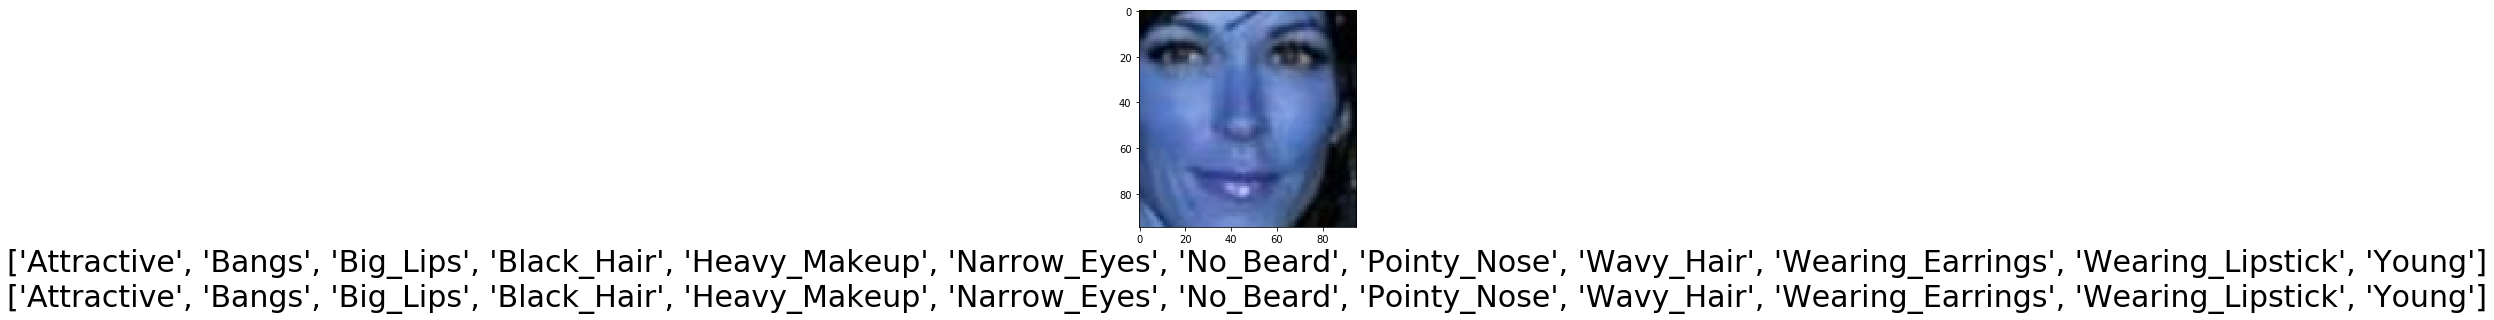

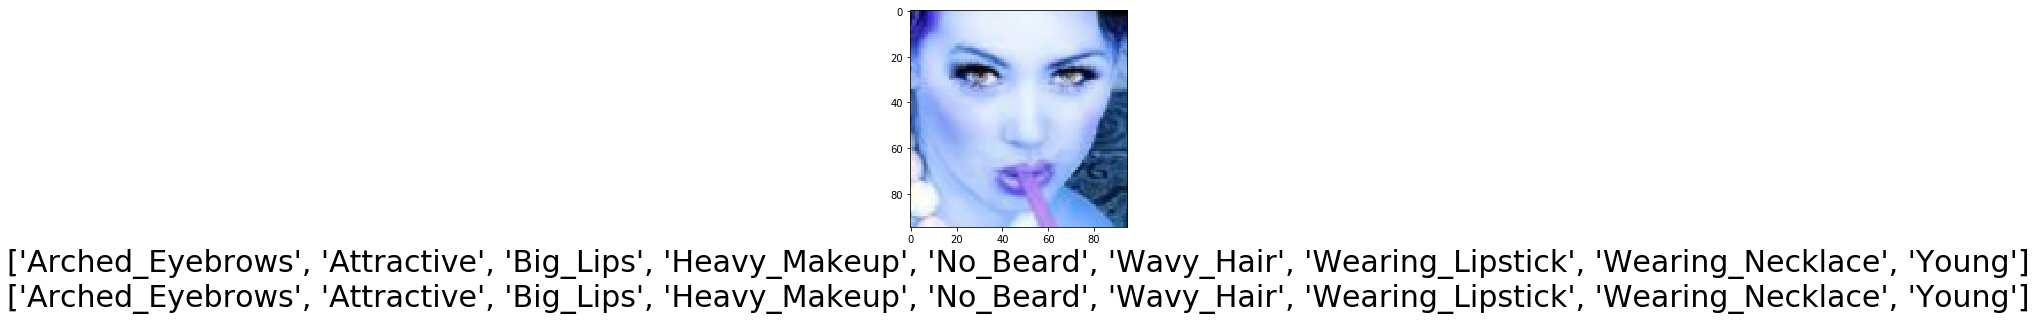

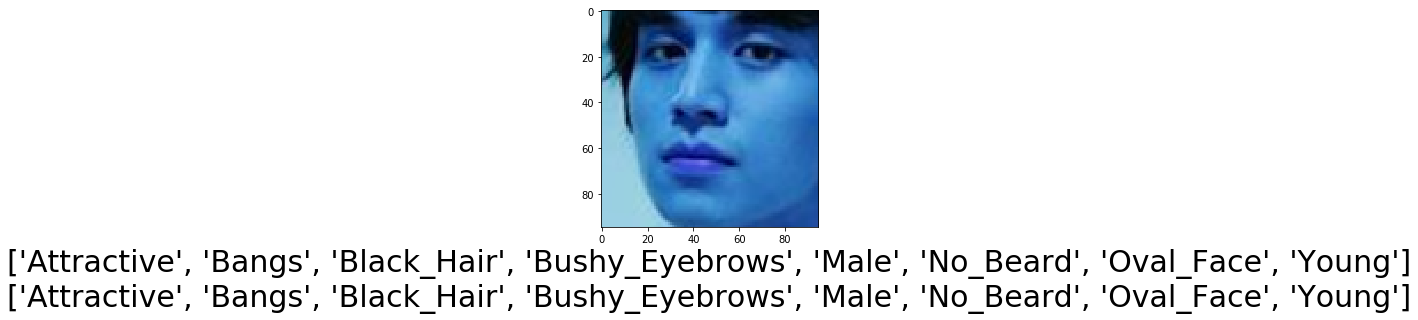

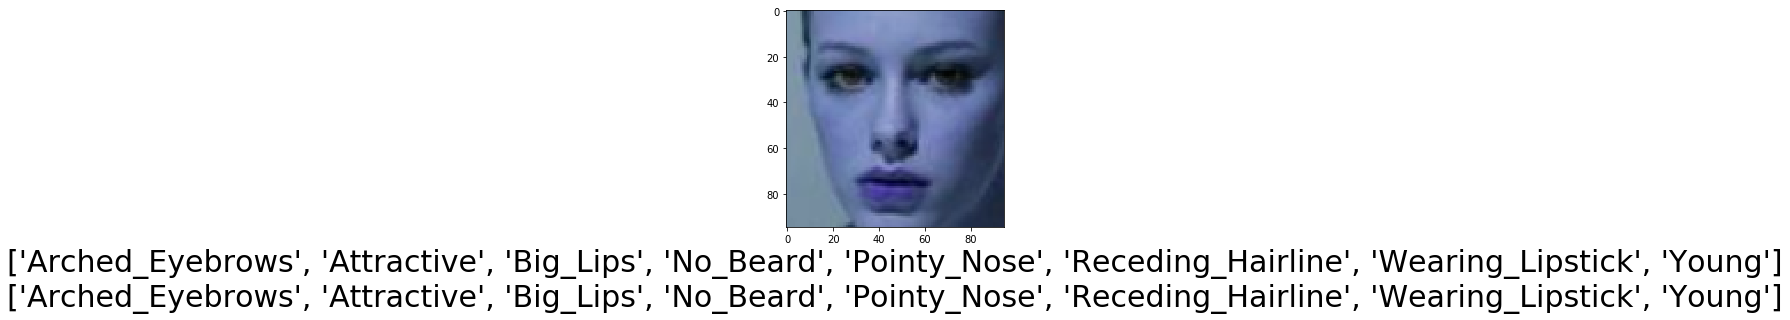

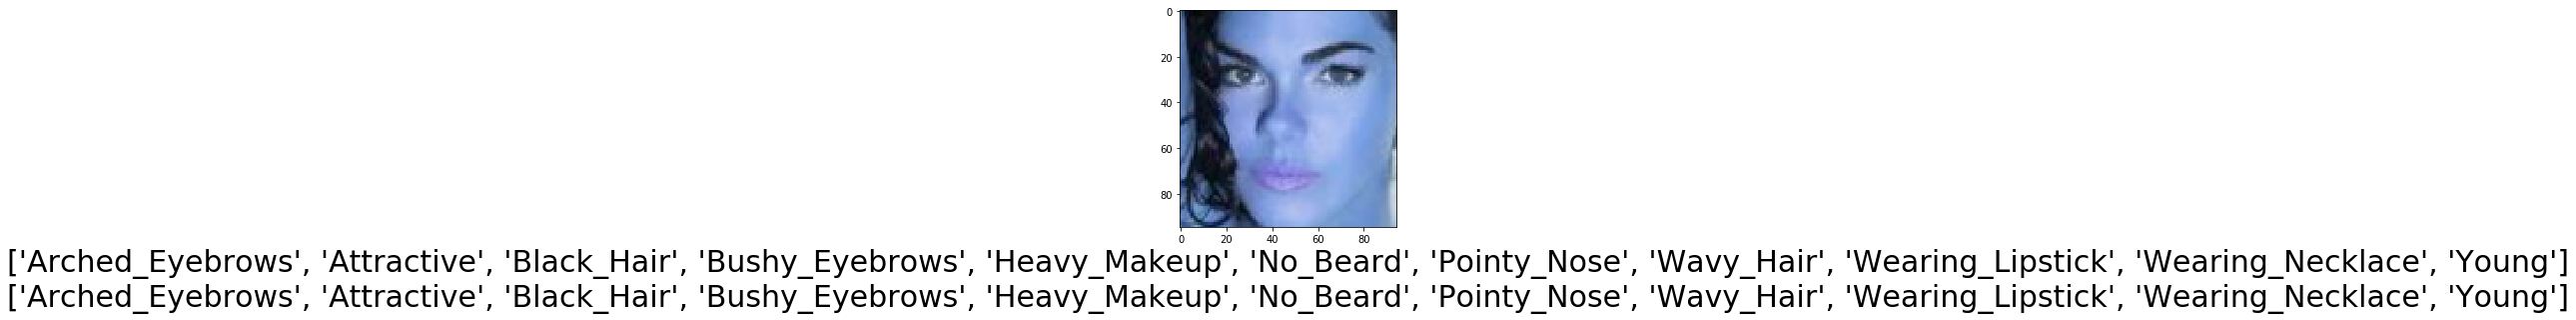

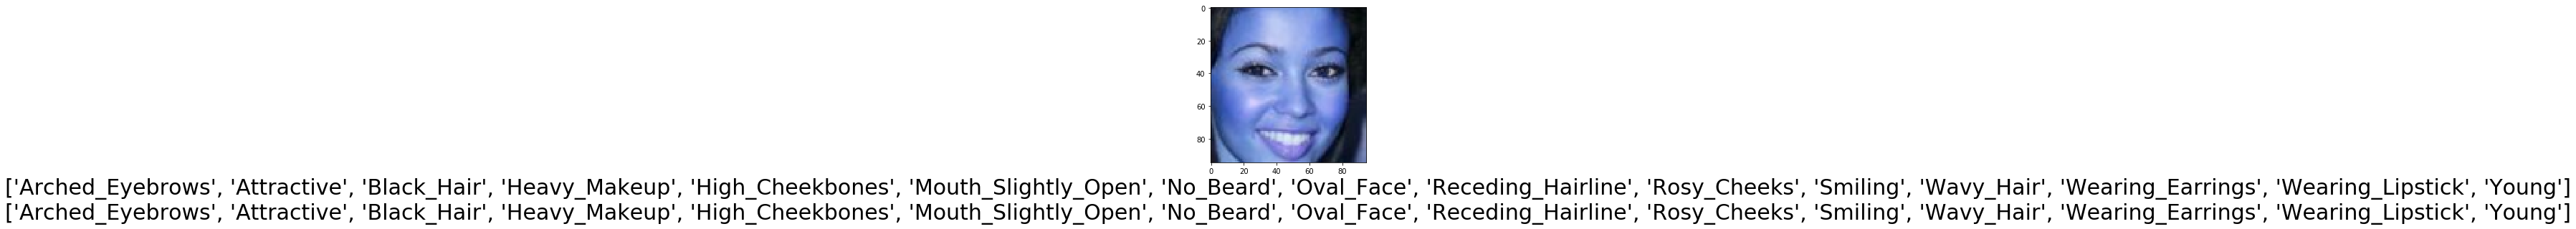

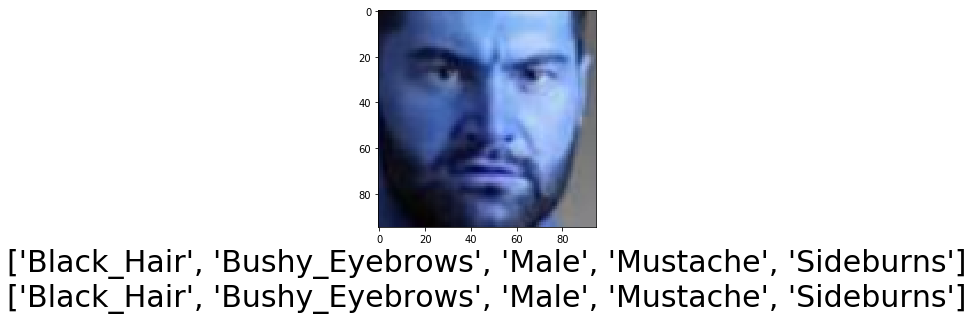

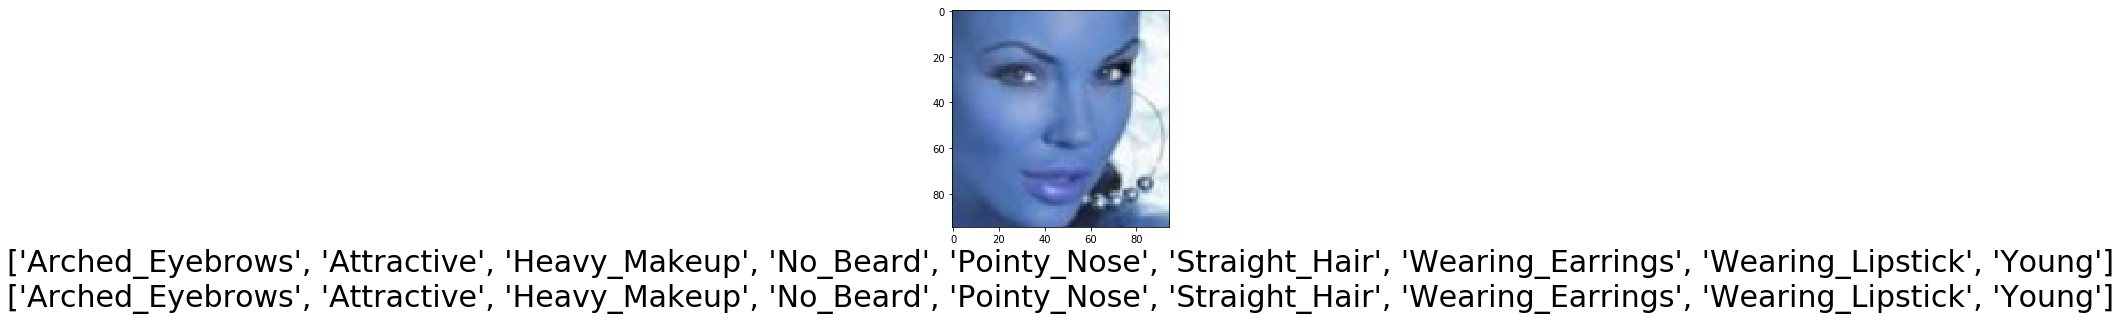

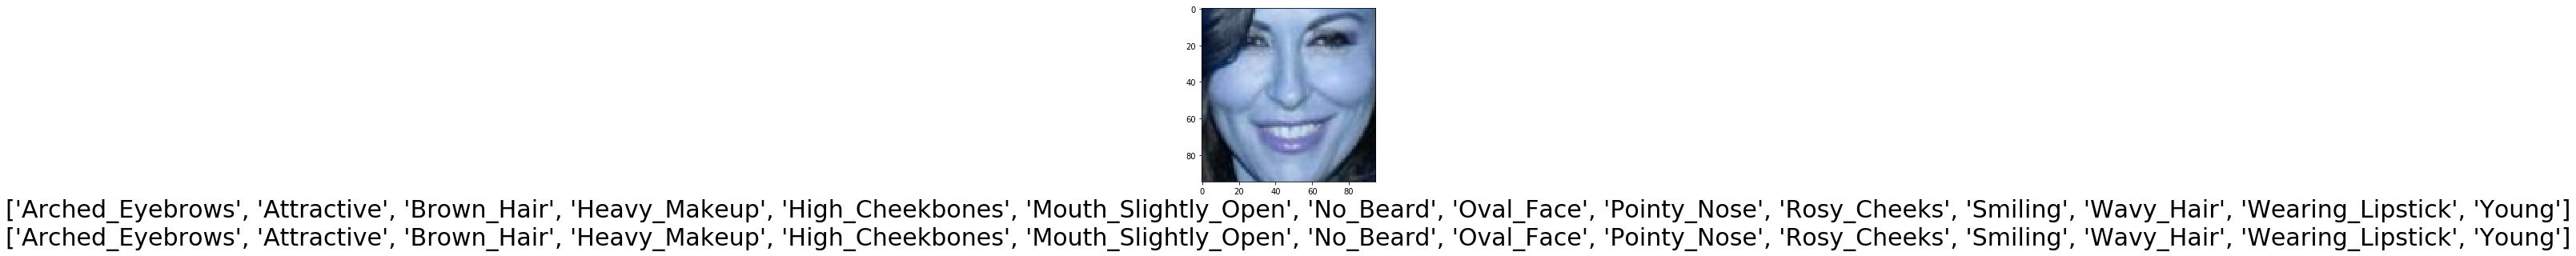

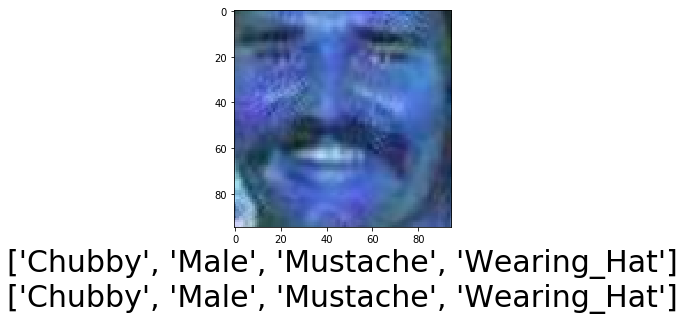

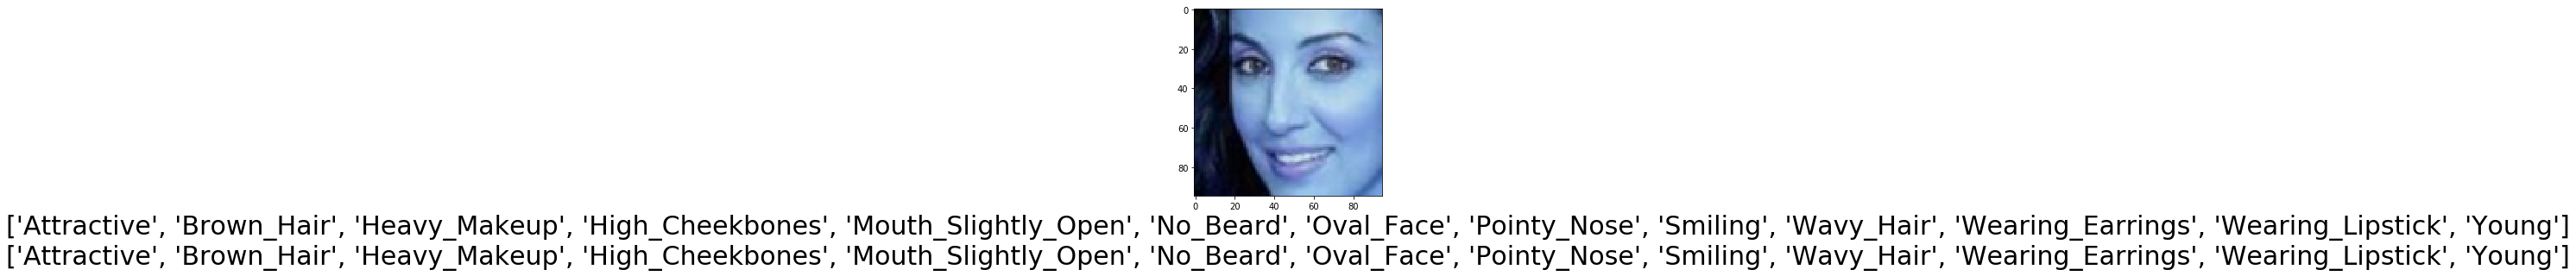

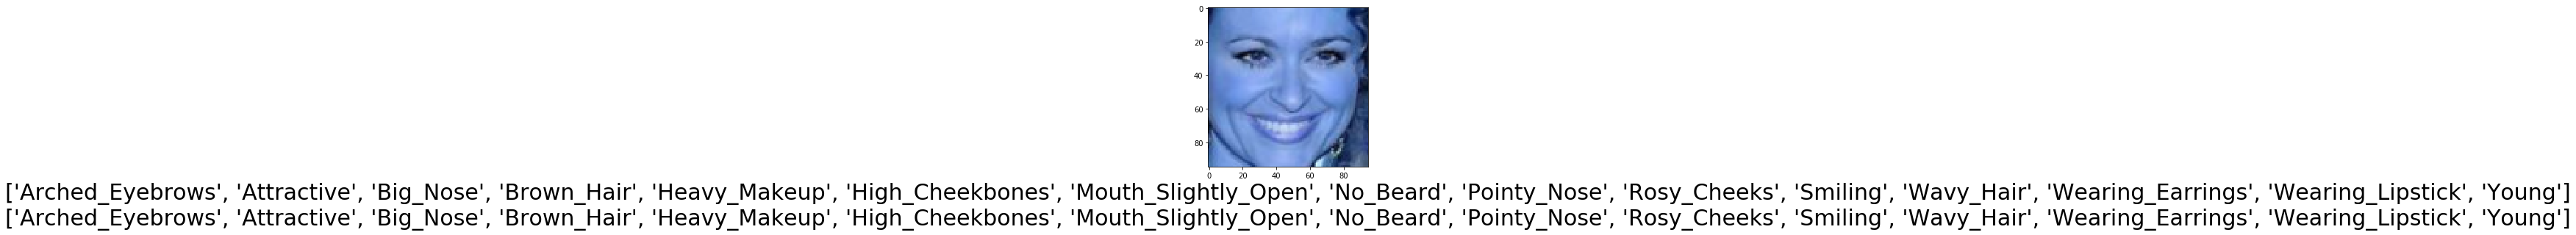

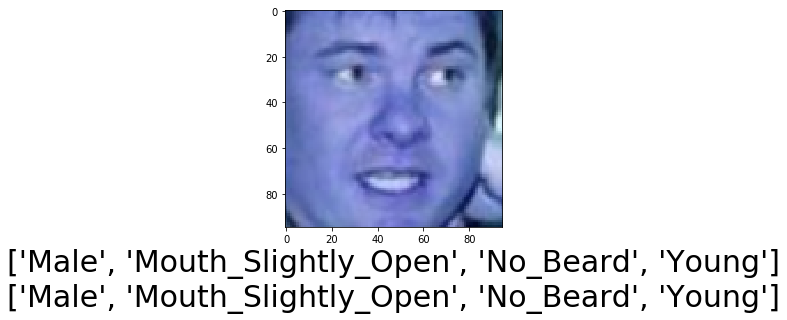

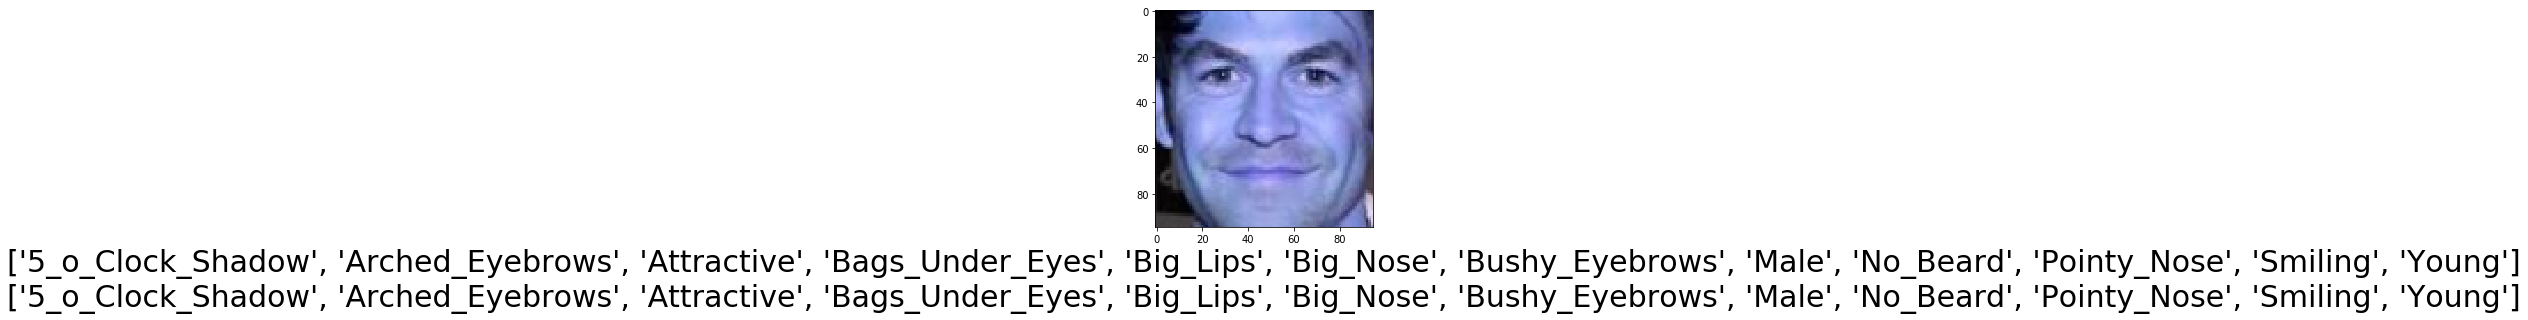

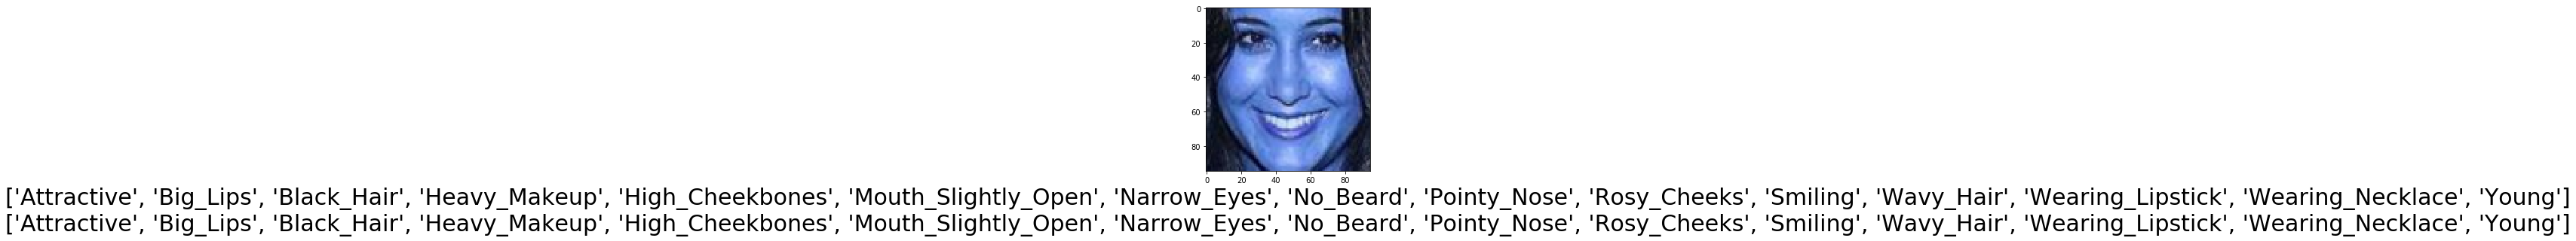

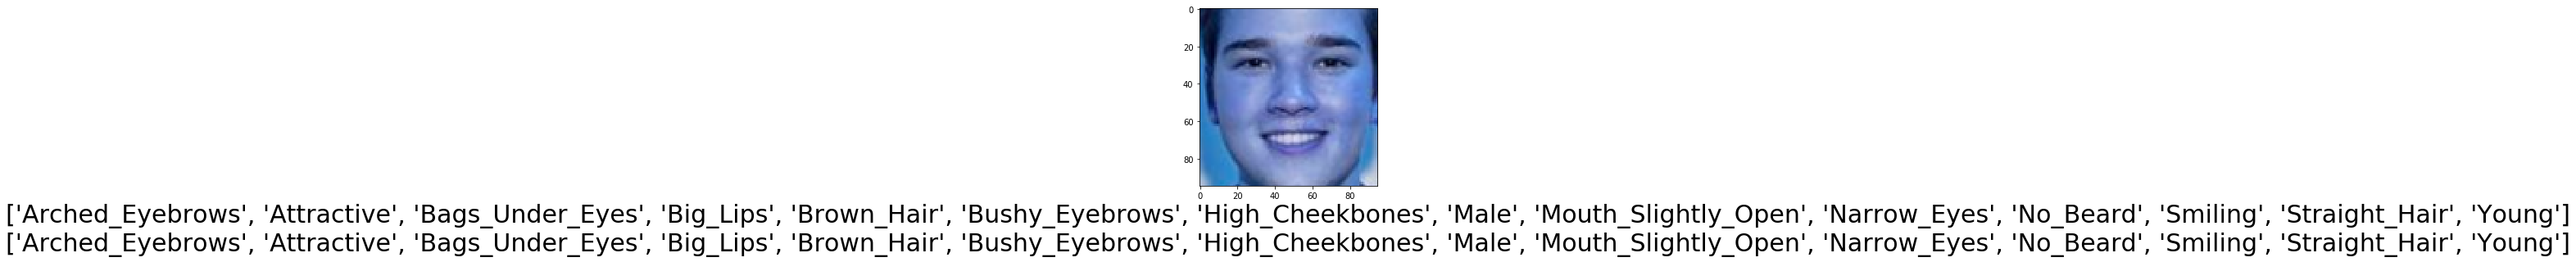

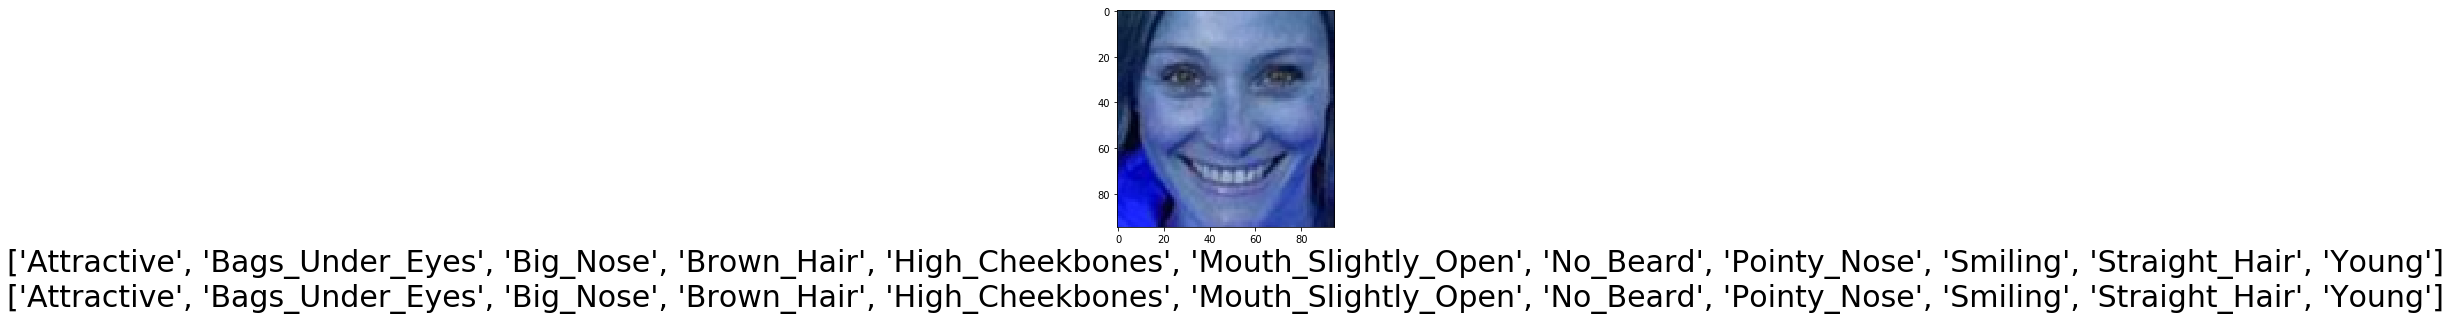

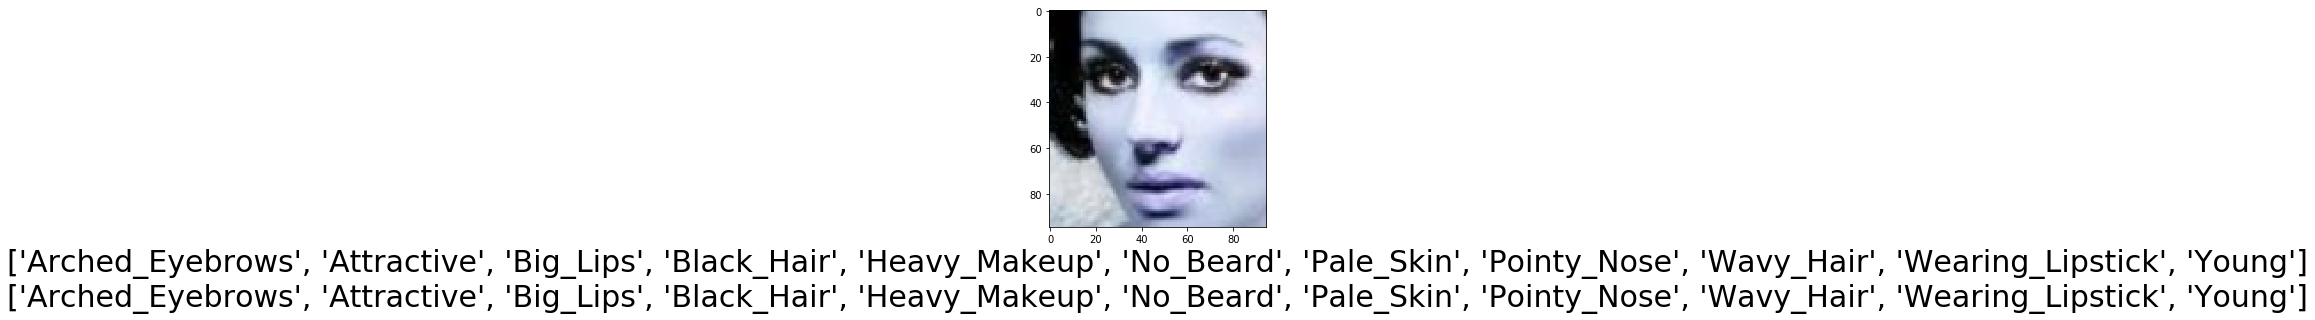

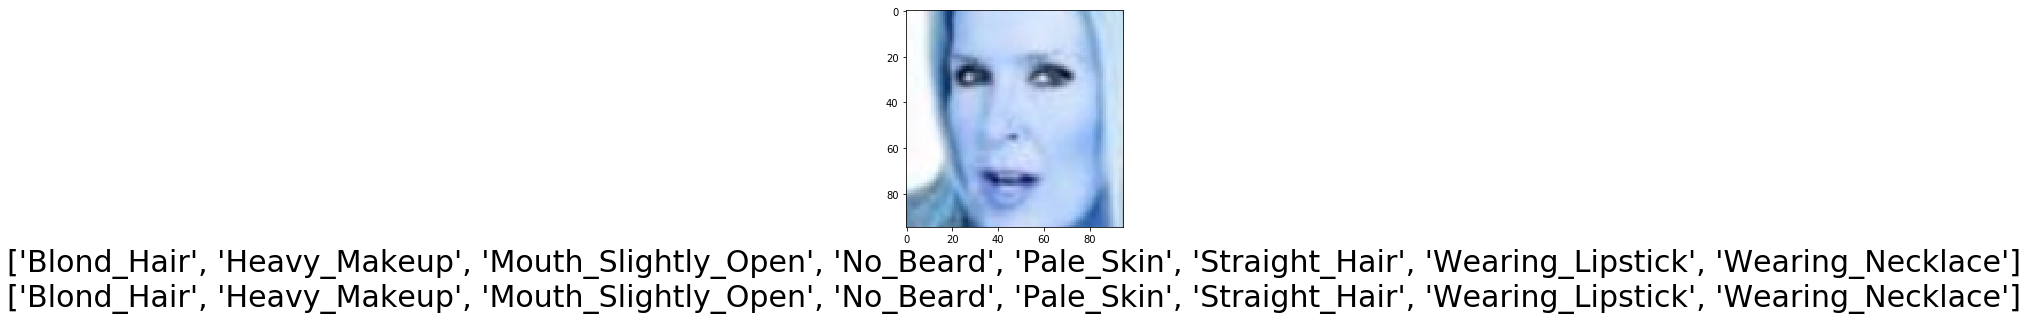

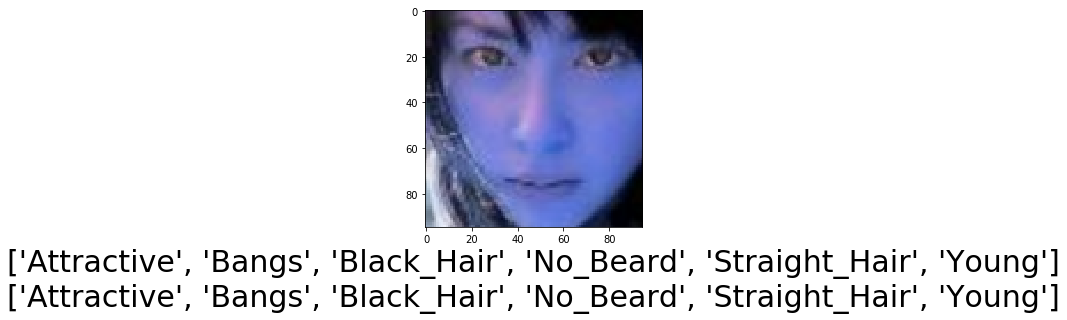

In [140]:
threshold = .5
# plt.figure(figsize=(100,100))

for i, prediction in enumerate(predictions):
    if i == 20:
        break
    else:
        actual = test_Y[i]
#         print(actual)
        actual_verbose = [label_names[i] for i in np.nonzero(actual == 1)[0]]
#         print(actual_verbose)
#         print(prediction)
        prediction[prediction < threshold] = 0
        prediction[prediction >= threshold] = 1
        prediction_verbose = [label_names[i] for i in np.nonzero(actual == 1)[0]]
#         print(prediction_verbose)
#         print()
#         print(test_X[i].shape)
        img = test_X[i] * 255
        img = img.astype(int)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         plt.subplot(10,2,i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.xlabel(str(prediction_verbose) + '\n' + str(actual_verbose), fontsize=30)
        plt.figure()
        plt.xlabel(str(prediction_verbose) + '\n' + str(actual_verbose), fontsize=30)
        plt.imshow(img)
        
        
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_X[i], cmap=plt.cm.binary)
# #     plt.xlabel(class_names[train_labels[i]])
        

In [141]:
pred = predictions[1]
threshold = .7
pred[pred < threshold] = 0
pred[pred >= threshold] = 1
pred = pred.astype(int)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [142]:
im_path = d[:3000][1]
im_path

'202545.png'

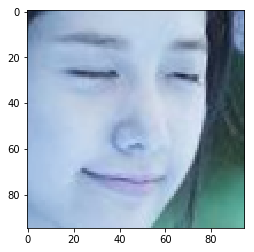

In [143]:
i =cv2.imread(os.path.join(p, im_path))
plt.imshow(i)

In [144]:
pred = list(pred)
for index, i in enumerate(pred):
    if i == 1:
        print(label_names[index])

Attractive
Heavy_Makeup
No_Beard
Wearing_Lipstick
Young
